In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import chardet   #for encoding
import warnings   # to avoid the warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',0)
import re

In [3]:
#Let's see which encoding we have to apply.
with open("Bengaluru_House_Data_price.csv","rb") as f:
    result=chardet.detect(f.read(100000))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [4]:
#so,we have to apply ascii encoding.
data=pd.read_csv("Bengaluru_House_Data_price.csv",encoding="ascii")

In [5]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
data.shape

(13320, 9)

In [7]:
df0=data.copy()

In [8]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Visualizing the unique values in 'size' column 

In [10]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

Standarding the 'size' column to a uniform format (BHK)


In [11]:
def extract_number_of_rooms(size):
    match = re.match(r'(\d+)', str(size))
    if match:
        return int(match.group(1))  # Return the numeric part as an integer
    return None  # Handle cases where no number is found (e.g., '1 RK')

# Apply the function to create the 'BHK' column

data['BHK'] = data['size'].apply(extract_number_of_rooms)

In [12]:
#Drop 'size' Columns
data.drop(columns=['size'],axis=1,inplace=True)

In [13]:
data['BHK'].value_counts()

2.0     5528
3.0     4857
4.0     1417
1.0      656
5.0      356
6.0      221
7.0      100
8.0       89
9.0       54
10.0      14
11.0       4
27.0       1
19.0       1
16.0       1
43.0       1
14.0       1
12.0       1
13.0       1
18.0       1
Name: BHK, dtype: int64

In [14]:
data.isnull().sum()

area_type          0
availability       0
location           1
society         5502
total_sqft         0
bath              73
balcony          609
price              0
BHK               16
dtype: int64

"society" Have almost 40% missing data.so, we can remove that columns.

society  --->Missing Value ---->5502

BHK  --->Missing Value ---->16

bath----->Missing Value --->73

balcony ---->Missing Value --->609

location ---->Missing Value --->1


<Axes: >

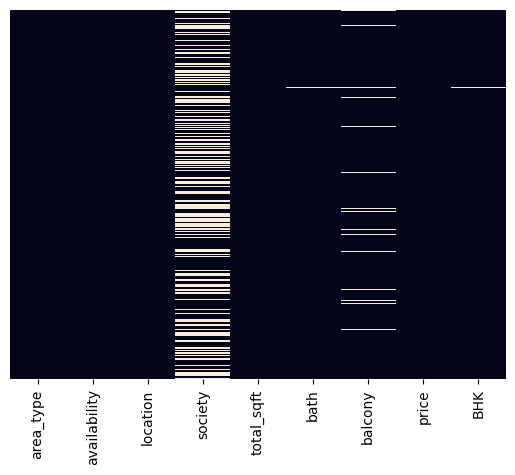

In [15]:
#Let's Visualize the missing value
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

It's Clearly visible 'society' have almost 40% value are missing and balcony also has many missing values, BHK also have some missing value. so,for 'society' and 'balcony' columns it's better to drop.

In [16]:
#Drop 'society' Columns
data.drop(columns=['society'],axis=1,inplace=True)

In [17]:
data.shape

(13320, 8)

In [18]:
#Drop 'balcony' Columns
data.drop(columns=['balcony'],axis=1,inplace=True)

In [19]:
data.shape

(13320, 7)

In [20]:
data.isnull().sum()

area_type        0
availability     0
location         1
total_sqft       0
bath            73
price            0
BHK             16
dtype: int64

Replacing Our missing Data with Mode values


In [21]:
data['location'].fillna(data['location'].mode()[0],inplace=True)

In [22]:
mode_value = data['BHK'].mode()[0]

data['BHK'].fillna(mode_value,inplace=True)

In [23]:
data['bath'].fillna(data['bath'].mode()[0],inplace=True)

In [24]:
data.isnull().sum()

area_type       0
availability    0
location        0
total_sqft      0
bath            0
price           0
BHK             0
dtype: int64

In [25]:
data.head()

,area_type,availability,location,total_sqft,bath,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,51.00,2.0


In [26]:
def convert_sqft_to_num(x):
    if '-' in str(x):
        vals = x.split('-')
        return (float(vals[0]) + float(vals[1])) / 2
    try:
        return float(x)
    except ValueError:
        return None

data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)


### Let's convert price to cost per square feet

In [27]:
data['total_price_per_sqft']=(data['price']*100000)/data['total_sqft']

data['total_price_per_sqft'].head()

0    3699.810606
1    4615.384615
2    4305.555556
3    6245.890861
4    4250.000000
Name: total_price_per_sqft, dtype: float64

In [28]:
data.describe()

,total_sqft,bath,price,BHK,total_price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


### Let's Drop unnecessary columns 



In [29]:
data=data.drop(columns=['availability'])
data.head()

,area_type,location,total_sqft,bath,price,BHK,total_price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2.0,4250.000000


### Now Let's Handle Categorical Data 
1> Location

In [30]:
data['location'].value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [31]:
data['location']=data['location'].apply(lambda x: x.strip())
location_count=data['location'].value_counts()

In [32]:
location_count

Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [33]:
location_count_formatted=location_count[location_count<=10]


data['location']=data['location'].apply(lambda x: 'other' if x in location_count_formatted else x)

data['location'].value_counts()

other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [34]:
data.shape

(13320, 7)

### Let's Perform one hot encoding

In [35]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [36]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy variable trap

# Apply one-hot encoding to the 'area_type' column
one_hot_encoded = encoder.fit_transform(data[['area_type']])

# Create a DataFrame with the one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['area_type']))

# Concatenate the one-hot encoded dataframe with the original dataframe
data_encoded = pd.concat([data, one_hot_df], axis=1)

# Drop the original 'area_type' column
data_encoded = data_encoded.drop('area_type', axis=1)



In [37]:
data_encoded.head()

,location,total_sqft,bath,price,BHK,total_price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606,0.0,0.0,1.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615,0.0,1.0,0.0
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556,0.0,0.0,0.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861,0.0,0.0,1.0
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000,0.0,0.0,1.0


In [38]:
print(data.shape)
print(data_encoded.shape)

(13320, 7)
(13320, 9)


In [39]:
#let's take a copy of our data for future use
df=data.copy()

In [40]:
data_encoded=data_encoded.dropna(axis=0)

In [41]:
data_encoded.columns

Index(['location', 'total_sqft', 'bath', 'price', 'BHK',
       'total_price_per_sqft', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area'],
      dtype='object')

In [42]:
data=data_encoded
data.head()

,location,total_sqft,bath,price,BHK,total_price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606,0.0,0.0,1.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615,0.0,1.0,0.0
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556,0.0,0.0,0.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861,0.0,0.0,1.0
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000,0.0,0.0,1.0


In [43]:
data.describe()

,total_sqft,bath,price,BHK,total_price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
count,13274.000000,13274.000000,13274.000000,13274.000000,1.327400e+04,13274.000000,13274.000000,13274.000000
mean,1559.626694,2.687359,112.453654,2.801718,7.907501e+03,0.006479,0.151198,0.661368
std,1238.405258,1.336158,149.070368,1.291591,1.064296e+05,0.080233,0.358255,0.473262
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02,0.000000,0.000000,0.000000
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03,0.000000,0.000000,0.000000
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03,0.000000,0.000000,1.000000
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03,0.000000,0.000000,1.000000
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07,1.000000,1.000000,1.000000


### Let's Findout the outlier in the dataset


Here the minimum total_sqft seems to be 1 which is an outlier.

Hence total_sqft per BHK is computed to find the prominent size of every flat

In [44]:
(data['total_sqft']/data['BHK']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [45]:
data=data[((data['total_sqft']/data['BHK'])>=300)]
data.describe()

,total_sqft,bath,price,BHK,total_price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357,0.006544,0.110455,0.696648
std,1261.271296,1.077938,152.077329,0.976678,4162.237981,0.080635,0.313468,0.459724
min,300.000000,1.000000,8.440000,1.000000,267.829813,0.000000,0.000000,0.000000
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316,0.000000,0.000000,0.000000
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647,0.000000,0.000000,1.000000
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667,0.000000,0.000000,1.000000
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235,1.000000,1.000000,1.000000


In [46]:
data.shape

(12530, 9)

## Handling outlier in total price

In [47]:
data['total_price_per_sqft'].describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: total_price_per_sqft, dtype: float64

Here the max value is considered as outlier from the interquartile ranges


In [48]:
def remove_outliers_sqft(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.total_price_per_sqft)

        st=np.std(subdf.total_price_per_sqft)
        gen_df=subdf[(subdf.total_price_per_sqft>(m-st)) & (subdf.total_price_per_sqft<=(m+st))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output

data=remove_outliers_sqft(data)
data.describe()


,total_sqft,bath,price,BHK,total_price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876,0.006019,0.073585,0.729638
std,880.694214,0.979449,86.342786,0.897649,2265.774749,0.077351,0.261107,0.444168
min,300.000000,1.000000,10.000000,1.000000,1250.000000,0.000000,0.000000,0.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959,0.000000,0.000000,0.000000
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739,0.000000,0.000000,1.000000
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429,0.000000,0.000000,1.000000
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922,1.000000,1.000000,1.000000


## Function to handle outlier in BHK

In [49]:
def bhk_outlier_remover(df):

    exclude_indices = np.array([])

    for location, location_df in df.groupby('location'):

        bhk_stats={}

        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {

                'mean': np.mean(bhk_df.total_price_per_sqft), 
                'std': np.std(bhk_df.total_price_per_sqft), 
                'count': bhk_df.shape[0]
            }

        # print(location,bhk_stats)

        for bhk,bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1) 
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df [bhk_df.total_price_per_sqft<(stats['mean'])].index.values) 
    return df.drop(exclude_indices, axis='index')

In [50]:
data=bhk_outlier_remover(data)

In [51]:
data.shape

(7361, 9)

In [52]:
data.head()

,location,total_sqft,bath,price,BHK,total_price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860,0.0,0.0,1.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491,0.0,0.0,1.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333,0.0,0.0,1.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333,0.0,0.0,0.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668,0.0,0.0,1.0


## EDA  

In [53]:
df1=data_encoded[['total_sqft', 'bath', 'BHK', 'total_price_per_sqft',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area']]

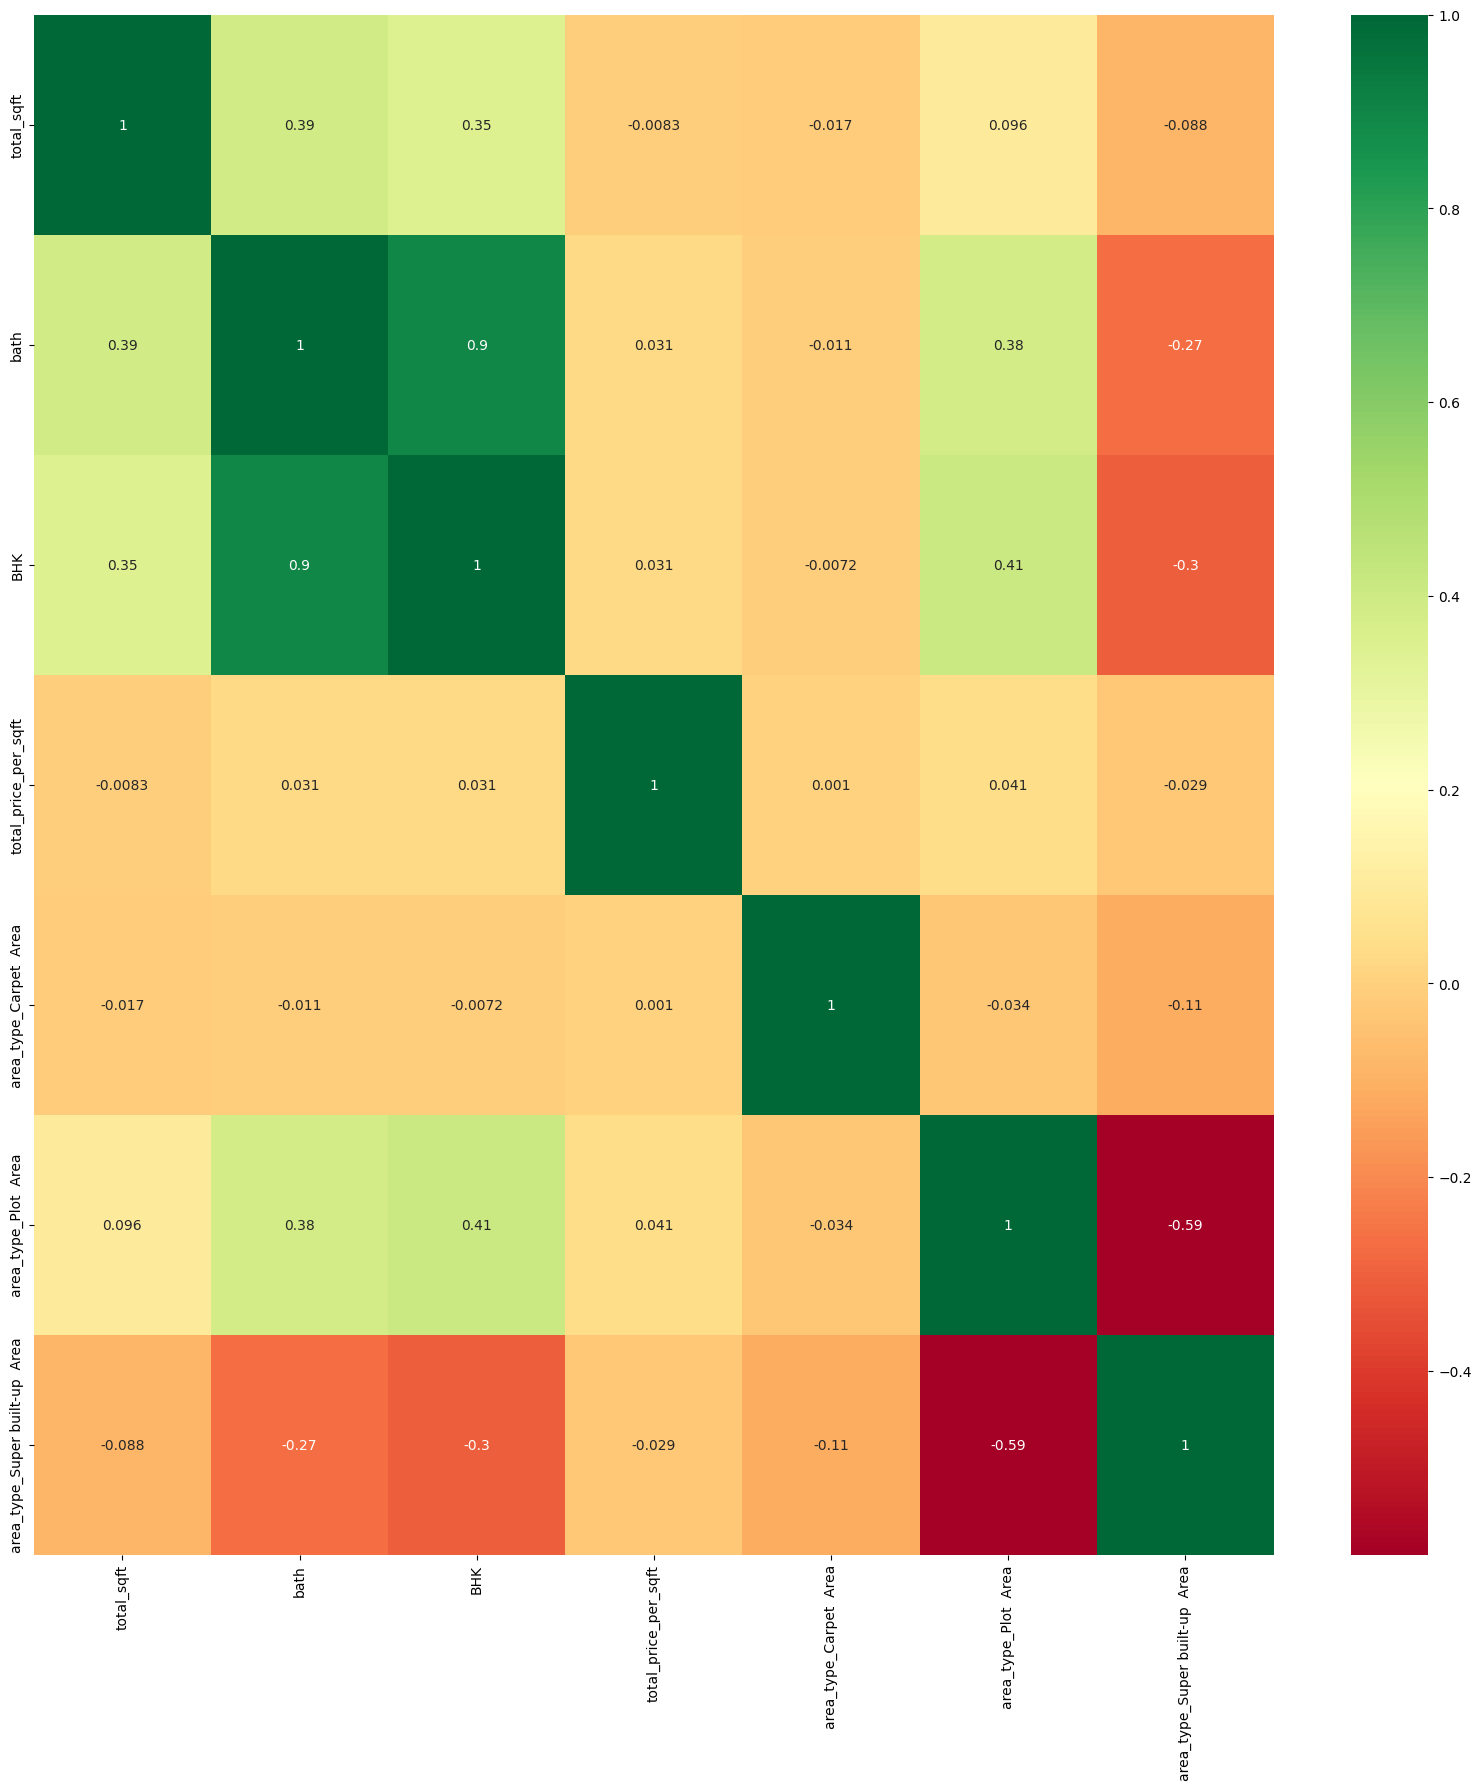

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,cmap = "RdYlGn")
plt.show()

### Summary of Heat-Map

i> totalPrice_sqft is highly positively corellated with area_type_Plot_Area, bath, and BHK

ii> totalprice_sqft is highly negative corellated with area_type_Super_built-up_Area

### Density Plot

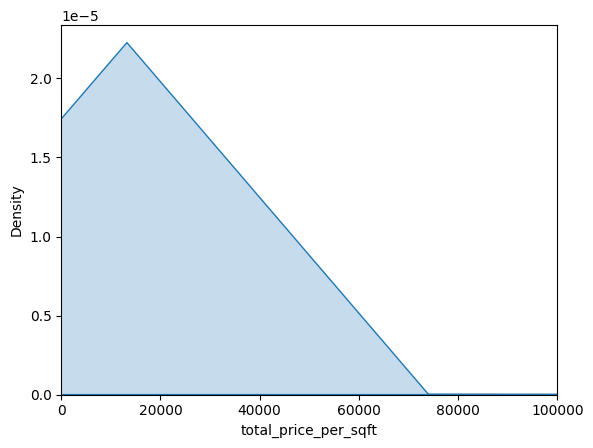

In [55]:
sns.kdeplot(data=data_encoded['total_price_per_sqft'],shade=True)

plt.xlim(0, 100000)  # Replace 0 and 10000 with desired range

# Display the plot
plt.show()

So,our most of the output features is lies between 0-75000

In [56]:
data_encoded['total_price_per_sqft'].describe()

count    1.327400e+04
mean     7.907501e+03
std      1.064296e+05
min      2.678298e+02
25%      4.266865e+03
50%      5.434306e+03
75%      7.311746e+03
max      1.200000e+07
Name: total_price_per_sqft, dtype: float64

In [57]:
df.head()

,area_type,location,total_sqft,bath,price,BHK,total_price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2.0,4250.000000


### Scatter Plot

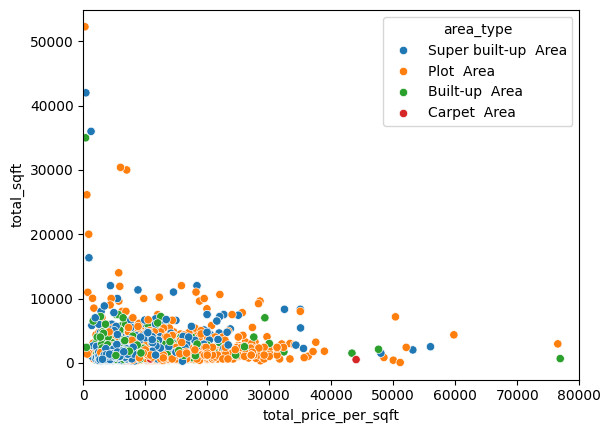

In [58]:
sns.scatterplot(x=df['total_price_per_sqft'],y=df['total_sqft'],hue=df['area_type'])

plt.xlim(0,80000)
plt.show()

So,most of the people prefer lesser sqft buildings in Plot and Super built-up Area

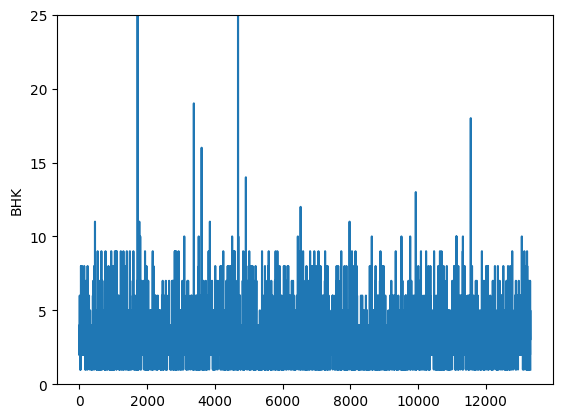

In [59]:
sns.lineplot(data=df['BHK'])
plt.ylim(0,25)
plt.show()

So most of the houses were within 1-6 BHK

In [60]:
data.head()

,location,total_sqft,bath,price,BHK,total_price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860,0.0,0.0,1.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491,0.0,0.0,1.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333,0.0,0.0,1.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,10833.333333,0.0,0.0,0.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,11983.805668,0.0,0.0,1.0


In [61]:
data.shape

(7361, 9)

#### Save the updated data in CSV Format 

In [62]:
data.to_csv("After_EDA.csv")